## **Projeto Analise de dados da Covid 19**
### <font color ='#ff8000' > *Analisando, Tratanto e Visualizando dados da Covid 19*
 *by [Guilherme Lima](https://www.linkedin.com/in/gui-lima-oficial/)*

### Qual o objetivo do projeto?
> O objetivo desse projeto e analisar como cada pais está se saindo com a covid 19, vamos realizar analises de casos confimados, casos ativos, recuperação e mortes, vamos realizar essas analises para fazer uma comparação de paises, para vermos quais paises então tendo um maior numero de mortes, casos confirmados,etc... também outra analise importante e qual e o pais com maior indice de mortalidade, todas as analises para acompanhar como cada pais está.

### Quais perguntas nossos dados vão nos responder?
- Qual pais tem o maior numero de casos, mortes, recuperações e casos ativos.
- Qual a tendencia de mortes, recuperações e casos confirmados.
- Visualizar quanto os meus testes realizados representam da minha população
- Quais paises foram mais afetados pelo corona
- Analisar os top 20 paises por casos confirmados, casos ativos, recuperações e mortes.
- Analisar a taxa de mortalidade
- Analisar a tendecia de casos confirmados, casos ativos, recuperações e mortes para um pais selecionado.

### Como nossos dados estão disponibilizados?
> Os dados estão disponilizados em um formato csv dentro de uma pasta do meu computador, cada csv tem suas próprias  propriedades e por isso vamos analisar cada arquivo de forma separada.

> 

### Inicinado o projeto
- A primeira fase do projeto vai ser extrair os dados do meu csv para o python, como cada dado tem sua propria propriedade e analise diferente nos vamos importar cada um de forma separada

#### Importando as bibliotecas necessarias

In [1]:
#Importando as bibliotecas necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.offline

>----

#### Fazendo o processo de Prepração dos dados
> Abrir diretorio, ler os dados, criar funções, limpar, etc... processo de preparação

In [2]:
#Usando a biblioteca os para lista os itens do meu diretorio
file= os.listdir(r'C:\Users\User\Documents\Hands-On\Project 3--_ Covid-19 Data Analysis\Covid-19')
#Exibindo
file

['country_wise_latest.csv',
 'covid_19_clean_complete.csv',
 'day_wise.csv',
 'full_grouped.csv',
 'usa_country_wise.csv',
 'worldometer_data.csv']

- Como vamos ter que extrair os dados de cada csv de forma separada, o melhor e criar uma função que vai nos facilitar esse processo.

In [3]:
#Criando uma função simples, através dela vamos poder ler os arquivos com mais facilidade. 
def read_data(path,filename):
        #A função vai pegar o caminho(path) que eu passar e o nome do arquivo(filename), vai colocar uma barra no meio e ler.
        return pd.read_csv(path+'/'+filename)

In [4]:
#Testando a função

#Criando uma variavel com o caminho do arquivo
path = r'C:\Users\User\Documents\Hands-On\Project 3--_ Covid-19 Data Analysis\Covid-19'

#Usando a função
world_data = read_data(path,'worldometer_data.csv')

In [5]:
#Exibindo minha variavel
world_data.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa

In [6]:
#Como o path já está definido, eu posso utilizar ele aqui novamente.

# So que dessa vez para nao precisar ficar colocando o nome do arquivo, eu vou pegar ele pelo index dele através.
day_data=read_data(path,file[2])

In [7]:
#Lendo o arquivo de index 3, lembrando que no python a contagem começa de 0, então aqui nos temos a informação de full_grouped
group_data=read_data(path,file[3])

In [8]:
#Lendo o arquivo de index 4, lembrando que no python a contagem começa de 0, então aqui nos temos a informação de usa_country_wise
usa_data=read_data(path,file[4])

In [9]:
#Lendo o arquivo de index 4, lembrando que no python a contagem começa de 0, então aqui nos temos a informação de covid_19_clean_complete
covid_19_data = read_data(path,file[1])

> ---

## Iniciniando as análises

### Primeira Pergunta: Qual pais tem o maior numero de casos, mortes, recuperações e casos ativos

In [10]:
#Exibindo o meu Data-Frame de mortes pelo mundo.
world_data.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa

In [11]:
#Exibindo as minhas colunas
world_data['Country/Region'].unique()

array(['USA', 'Brazil', 'India', 'Russia', 'South Africa', 'Mexico',
       'Peru', 'Chile', 'Colombia', 'Spain', 'Iran', 'UK', 'Saudi Arabia',
       'Pakistan', 'Bangladesh', 'Italy', 'Turkey', 'Argentina',
       'Germany', 'France', 'Iraq', 'Philippines', 'Indonesia', 'Canada',
       'Qatar', 'Kazakhstan', 'Egypt', 'Ecuador', 'Bolivia', 'Sweden',
       'Oman', 'Israel', 'Ukraine', 'Dominican Republic', 'Panama',
       'Belgium', 'Kuwait', 'Belarus', 'UAE', 'Romania', 'Netherlands',
       'Singapore', 'Guatemala', 'Portugal', 'Poland', 'Nigeria',
       'Honduras', 'Bahrain', 'Japan', 'Armenia', 'Ghana', 'Kyrgyzstan',
       'Afghanistan', 'Switzerland', 'Algeria', 'Azerbaijan', 'Morocco',
       'Uzbekistan', 'Serbia', 'Moldova', 'Ireland', 'Kenya', 'Venezuela',
       'Nepal', 'Austria', 'Costa Rica', 'Ethiopia', 'Australia',
       'El Salvador', 'Czechia', 'Cameroon', 'Ivory Coast', 'S. Korea',
       'Denmark', 'Palestine', 'Bosnia and Herzegovina', 'Bulgaria',
       'Mada

- Como podemos notar temos diversos paises, então colocar isso tudo em uma grafico e inviável pois a maioria não vai nem aparecer, então para resolver isso vamos pegar somente os top 10 paises.

In [12]:
#Pegando as colunas necessarias para responder minha pergunta
coluna=['TotalCases','TotalDeaths','TotalRecovered','ActiveCases']

#Pecorrendo minha lista de colunas.
for i in coluna:
    #Usando a biblioteca px para construir um grafico de treemap
    fig=px.treemap(
    #Chamando minha viriavel e usando o iloc para filtrar os top 10, esses são meus dados    
    world_data.iloc[0:10],
    #Aqui e a quantidade de graficos que ele vai fazer e o nome de cada grafico.
    values=i,
    #Vai Filtrar (segmentar) pelo Pais/Regiao.
    path=['Country/Region'],
    #O titulo do gráfico, usando o format para deixar o filtro variavel.   
    title='Gráfico de treemap para {}'.format(i)
)
    #Exibindo
    fig.show()

- Imagens

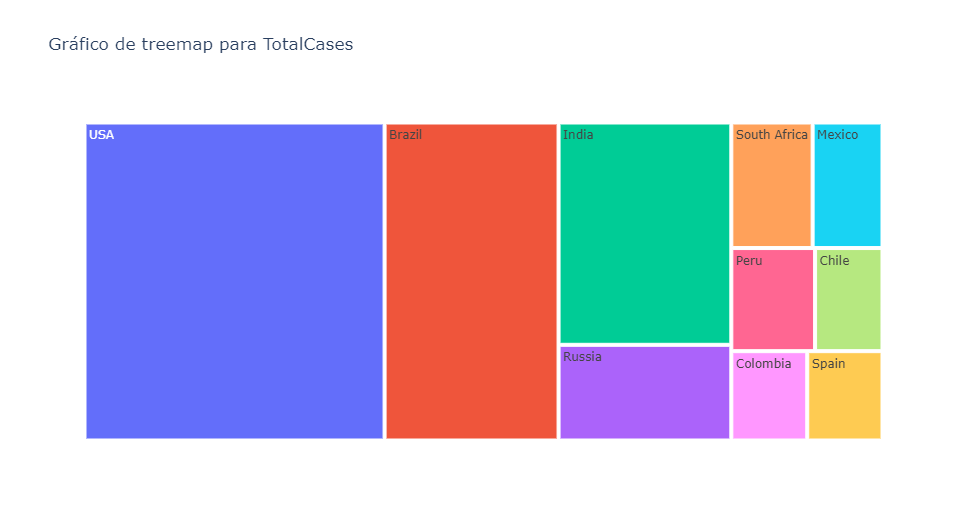

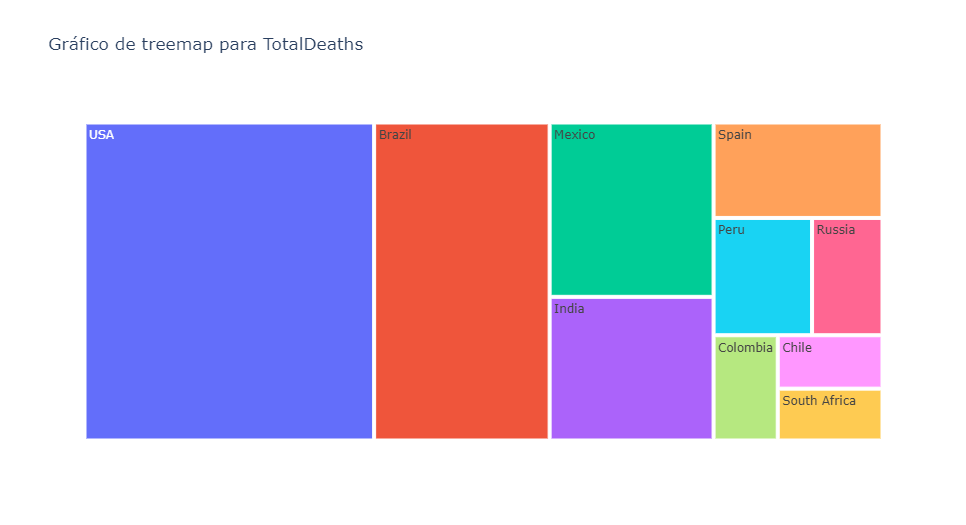

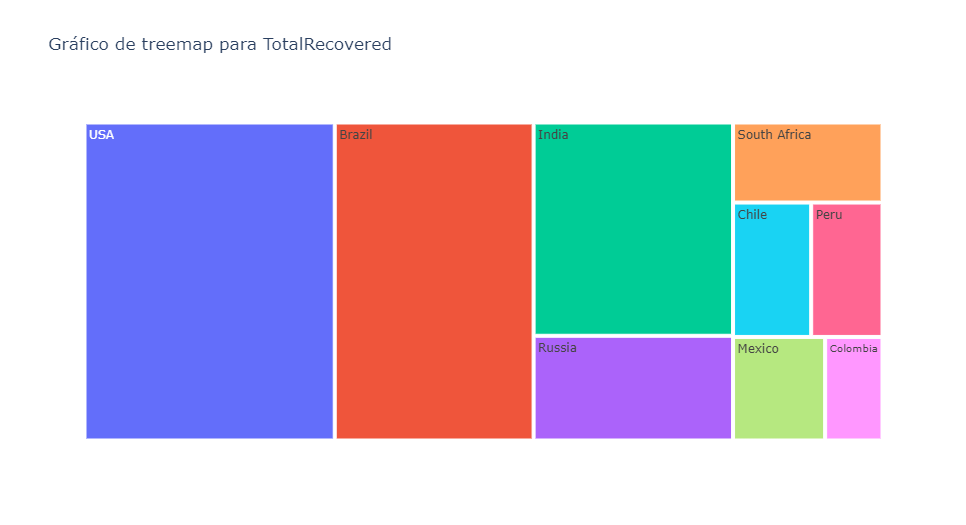

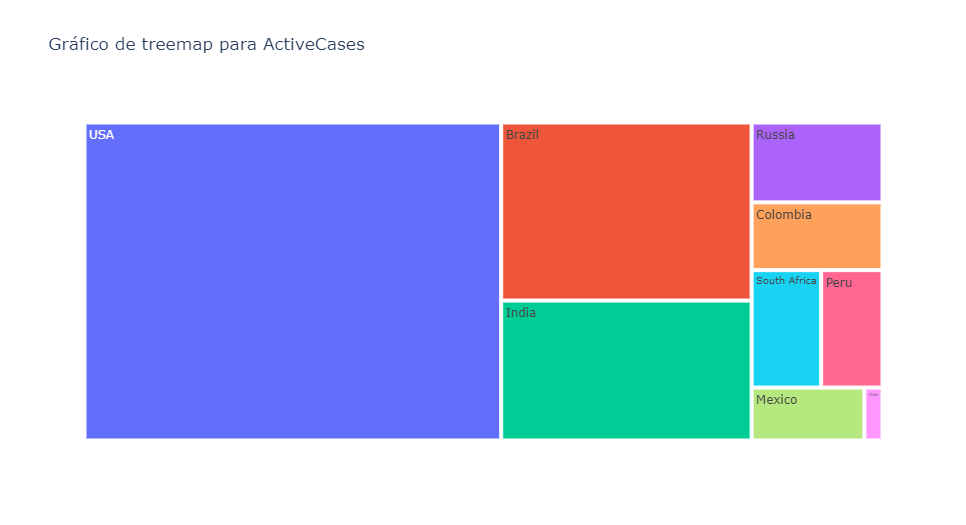

- Resposta:
>  O Pais com os maiores numeros de casos, mortes etc.. E o Estados unidos, podemos ver facilmente como o bloco dele se destaca em relação aos outros.

> ---

### Segunda Pergunta: Qual a tendencia de mortes, recuperaçoes e casos confirmados.
>Para responder essa pergunta vamos usar o nosso DataFrame day_data, como vamos analisar a tendencia ela será feita em dias.

In [13]:
#Exibindo as primeiras linhas
day_data.head()

Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0  2020-01-22        555      17         28     510          0           0   
1  2020-01-23        654      18         30     606         99           1   
2  2020-01-24        941      26         36     879        287           8   
3  2020-01-25       1434      42         39    1353        493          16   
4  2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2              6                2.76                   3.83   
3              3                2.93                   2.72   
4             13                2.64                   2.46   

   Deaths / 100 Recovered  No. of countries  
0                   60.71                 6  
1                   60.00                 8  
2                   72.22                 9  
3                  107.69                11  
4                  107.69                13

In [14]:
#Exibindo as colunas, para pegar as informações das colunas certas.
day_data.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

In [15]:
#Usando o px para plotar um gráfico de tendencia, ele vai nos ajudar a entender como as coisas então indo.
px.line(
    #Dados
    day_data,
    #Eixo x
    x='Date',
    #Como ele vai filtrar(segmentar) os dados, então ele vai trazer a informação de confirmed, deaths etc..
    y=['Confirmed', 'Deaths', 'Recovered', 'Active'],
    #Titulo
    title='Casos de covid',
    #Template, e uma formatação grafica.
    template='plotly_dark'
)

- Imagem

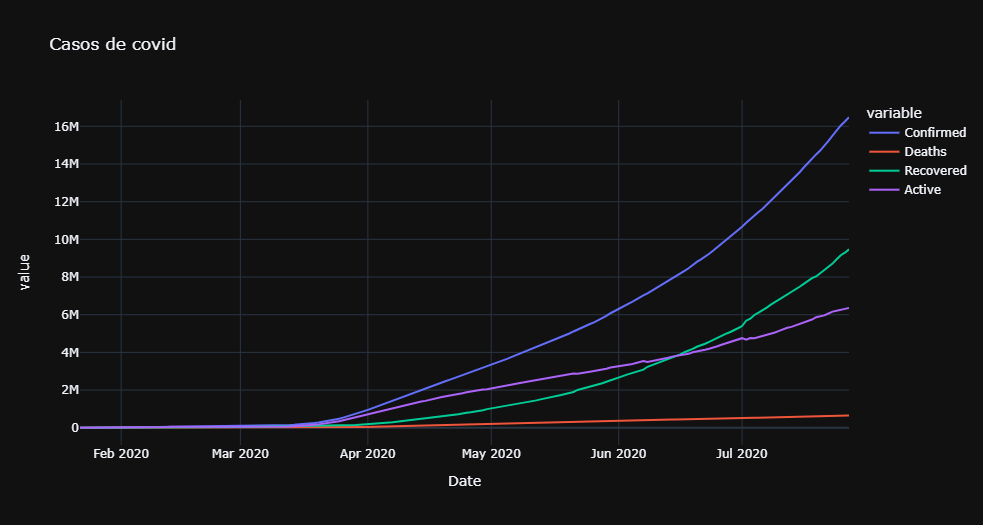

- Resposta:
> A tendencia e que mais pessoas se contaminem e se recuperem, porem minha tendencia de morte está estavel e se matendo nos padrões, pelo visto, a taxa de mortalidade pessoas vai diminuir enquanto a de recuperados vai aumentar.

> ---

### Desafio 1: Visualizar quanto os meus testes realizados representam da minha população

In [16]:
#Exibindo as primeiras linhas do DataFrame que será utilizado
world_data.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa

In [17]:
#Realizando a divisão, quanto minha população representa dos meus testes feitos, e pegando os top 20
top_20_pop_ratio = world_data['Population']/ world_data['TotalTests'].iloc[0:20]

In [18]:
#Usando o grafico de barra para analisar essa representação
#Usando o grafico de barra
fig=px.bar(
    #Filtrando o DataFrame pelos top 20
    world_data.iloc[0:20],
    #Eixo x
    x='Country/Region',
    #Pegando os 20 primeiros resultados da minha dvisão.
    y= top_20_pop_ratio[0:20],
    #Vai colorir por pais
    color='Country/Region',
    #Titulo do grafico
    title='Analise Dos Testes Feitos Para Cada Pais (Numero De Pessoas Vs Testes Realizados)'
)
#Exibindo
fig.show()

- Imagem

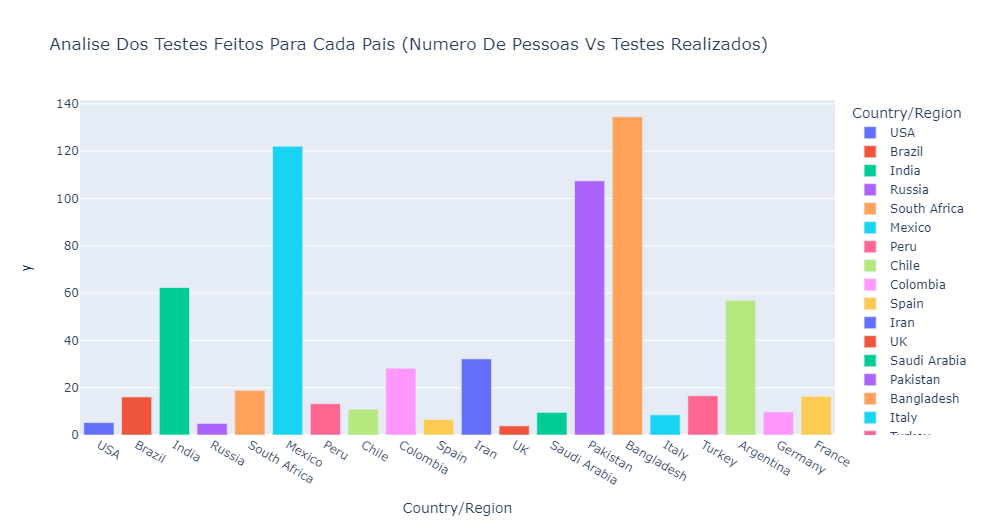

> ---

### Desafio 2: Quais pais foram mais afetados pelo corona

In [19]:
#Exibindo as colunas do meu DataFrame do mundo
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [20]:
px.bar(
    #Filtrando pelos top 20
    world_data.iloc[0:20],
    #eixo x
    x= 'Country/Region',
    #Por quais informações ele vai quebrar (segmentação)
    y= ['Serious,Critical','TotalDeaths','TotalRecovered','ActiveCases','TotalCases']

)

- Imagem

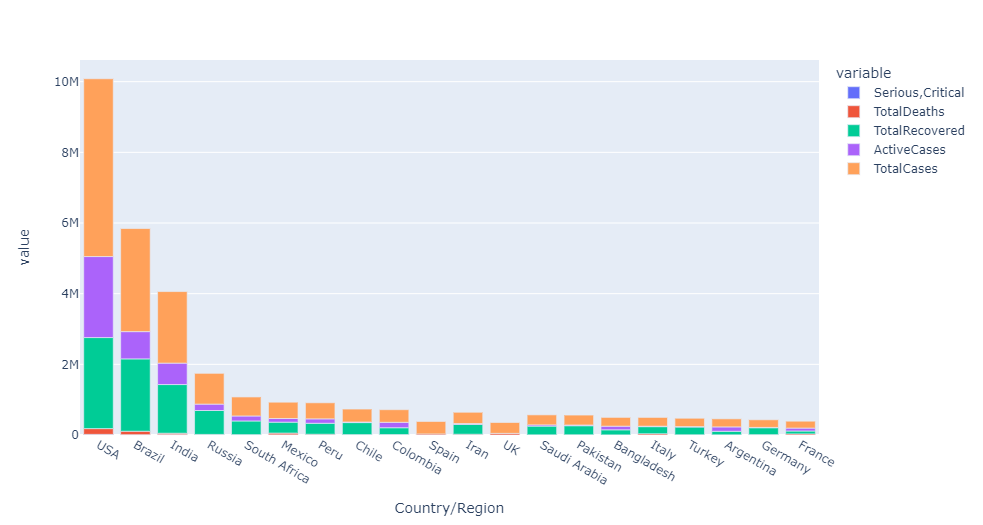

- Reposta:
> O pais mais afetado pelo corona foi o Estados Unidos.

> ---

### Analise dos 20 paises com maior numero de casos confirmados, casos ativos, recuperações e mortes

In [21]:
#Exibindo o dataframe world
world_data.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa

In [22]:
#Exibindo o nome das colunas
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

- Análise dos 20 paises com maior numero de casos confirmados.

In [23]:
#Utilizando o grafico de barras para fazer a analise.
fig=px.bar(
    #Filtrando o dataframe
    world_data.iloc[0:20],
    y='Country/Region',
    x='TotalCases',
    color = 'TotalCases',
    text='TotalCases'
)
#Atualizando meu layout, colocando um template dark
fig.update_layout(template='plotly_dark',
                  #Colocando um titulo
                  title_text='Top 20 Paises Por Total De Casos Confirmados.')
fig.show()

- Imagem

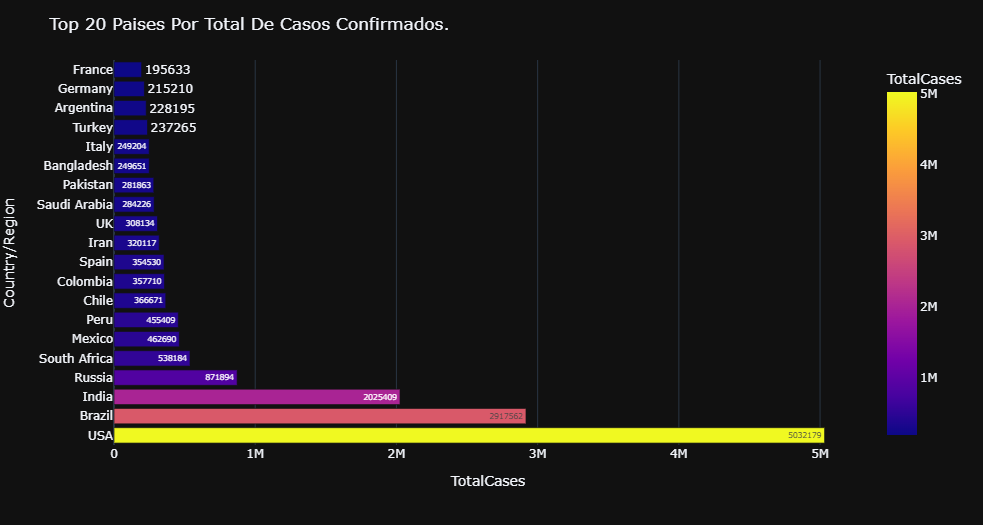

> ---

- Análise dos 20 paises com maior numero de mortes

In [24]:
#Utilizando o grafico de barras para fazer a analise.
fig=px.bar(
    #O ascendig = False aqui e para trazer meus dados do menor para o  maior.
    world_data.sort_values(by='TotalDeaths', ascending=False)[0:20],
    y='Country/Region',
    x='TotalDeaths',
    color = 'TotalDeaths',
    text='TotalDeaths'
)
fig.update_layout(template='plotly_dark',title_text='Top 20 Paises Por Total de Mortes.')
fig.show()

- Imagem

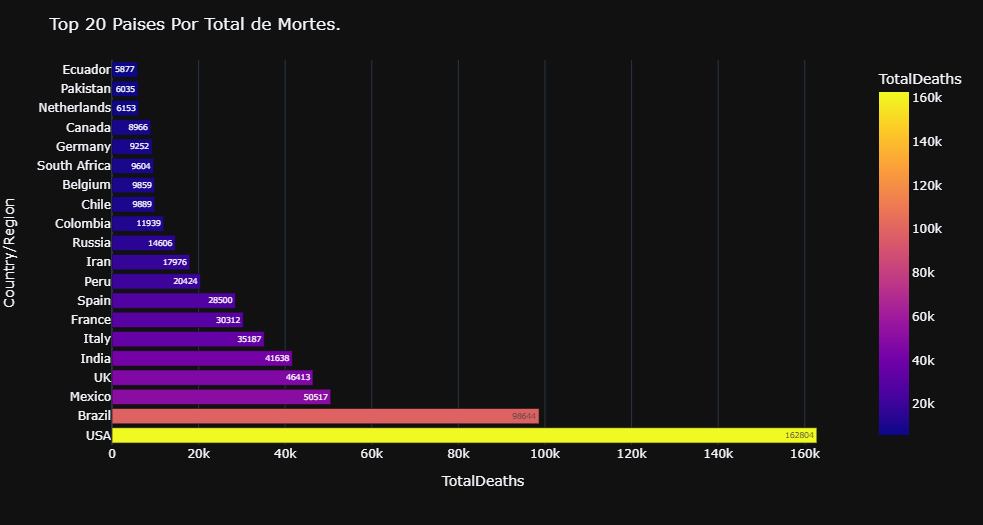

> ---

- Análise dos 20 paises com maior numero de casos ativos

In [25]:
#Utilizando o grafico de barras para fazer a analise.
fig=px.bar(
    world_data.sort_values(by='ActiveCases', ascending=False)[0:20],
    y='Country/Region',
    x='ActiveCases',
    color = 'ActiveCases',
    text='ActiveCases'
)
fig.update_layout(template='plotly_dark',title_text='Top 20 Paises Por Casos Ativos.')
fig.show()

- Imagem

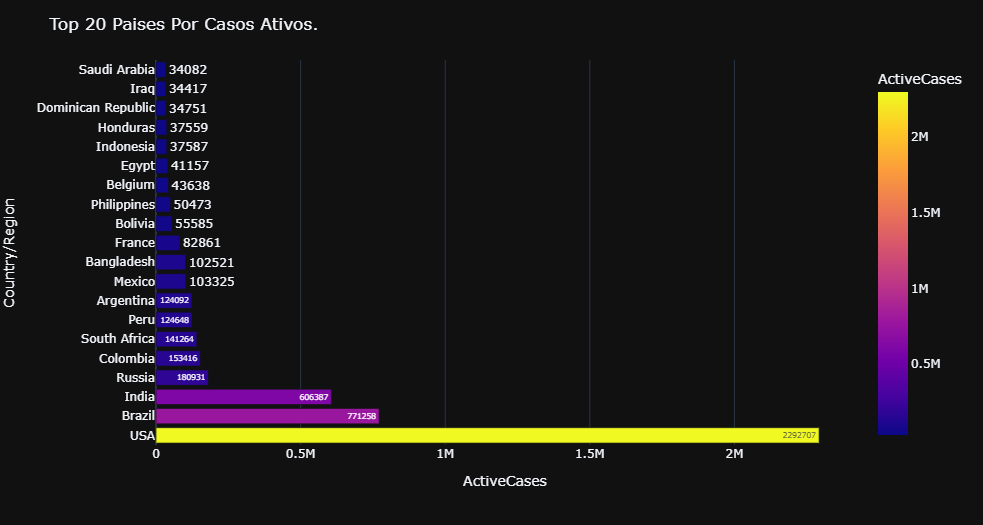

> ---

- Análise dos 20 paises por total de recuperados

In [39]:
#Utilizando o grafico de barras para fazer a analise.
fig=px.bar(
    world_data.sort_values(by='TotalRecovered', ascending=False)[0:20],
    y='Country/Region',
    x='TotalRecovered',
    color = 'TotalRecovered',
    text='TotalRecovered'
)
fig.update_layout(template='plotly_dark',title_text='Top 20 paises por total de recuperados.')
fig.show()

- Imagem

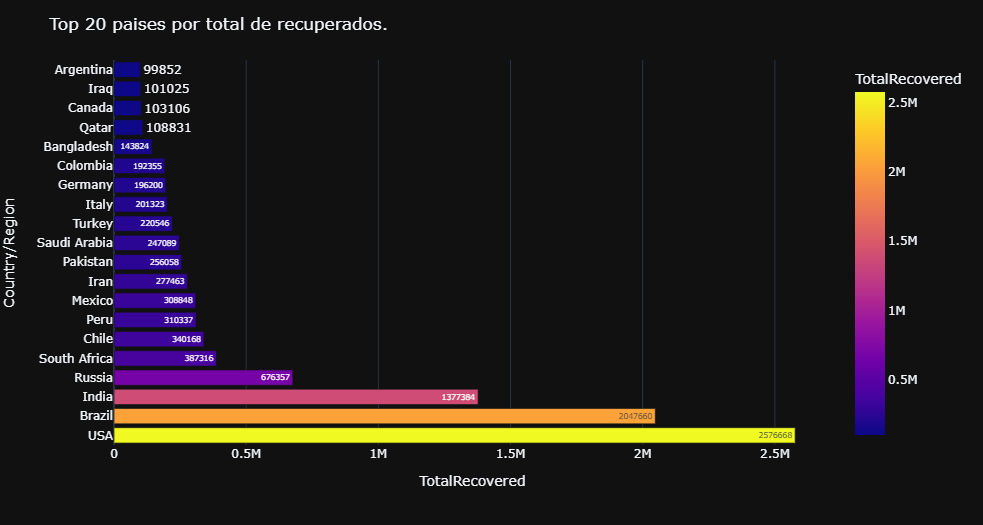

>---

### Analise de mortes:
>como taxa de mortes para recuperados, taxa de morte confirmadas,  taxa de  morte para casos com pessoas de alto risco.

In [27]:
#Exibindo meu dataframe
world_data.head()

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region  
0      190640.0        Americas  
1       62085.0        Americas  
2       16035.0  South-EastAsia  
3      203623.0          Europe  
4       53044.0          Africa

- Essa é uma analise de divisão de quanto as minhas mortes representam do meu total de casos, assim eu vou ter uma taxa de mortalidade.

#### Como não temos essa informação na tebela, nos vamos simplesmente dividir para fazer essa representividade.

- Taxa de mortes confirmadas por pais

In [28]:
#Quanto as minhas mortes representam dos meus casos confirmados.
mortes_confirmadas= world_data['TotalDeaths']/world_data['TotalCases']
#Exibindo a informação
mortes_confirmadas

0      0.032353
1      0.033810
2      0.020558
3      0.016752
4      0.017845
         ...   
204    0.076923
205         NaN
206         NaN
207         NaN
208    0.100000
Length: 209, dtype: float64

In [38]:
#Usando o Grafico de barras para visualizar os dados.
px.bar(
    world_data,
    x='Country/Region',
    #Chamando os valores da minha viriavel
    y=mortes_confirmadas
)
#Formando o grafico, fazendo o update dele.
fig.update_layout(title={'text':"Taxa de mortes confirmadas por pais"},template="plotly_dark")
fig.show()

- Imagem

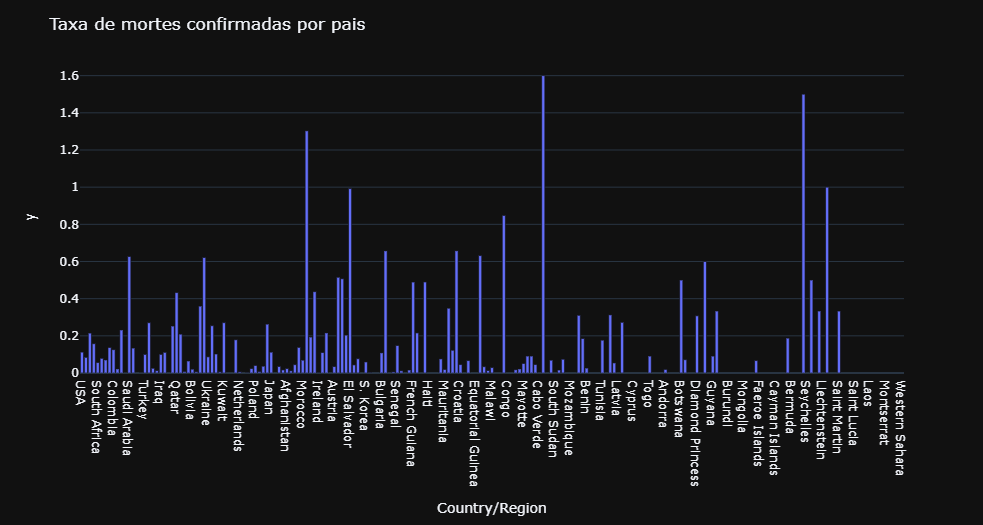

> ---

- Taxa de mortes por pessoas que tinham se recuperado.

In [30]:
#Fazendo a divisão de quanto minhas mortes representam do total de recuperados.
mortes_por_recuperados= world_data['TotalDeaths']/world_data['TotalRecovered']

In [31]:
#Usando o Grafico de barras para visualizar os dados.
fig=px.bar(
    world_data,
    x='Country/Region',
    y=mortes_por_recuperados)
#Formando o grafico, fazendo o update dele.
fig.update_layout(title={'text':"Taxa de mortes para curadas(Que já tinham pegado antes)"},template="plotly_dark")
fig.show()

- Imagem

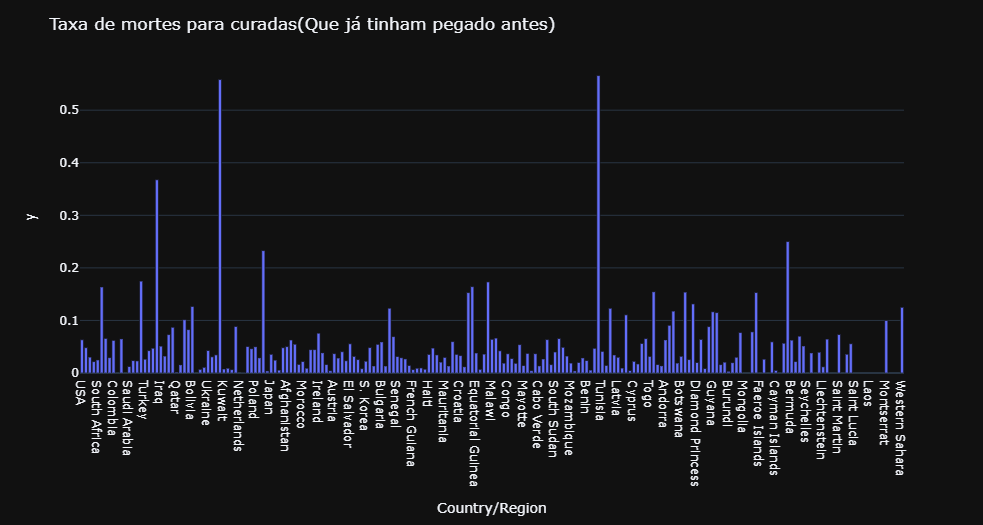

> ---

- Taxa de mortes por casos criticos

In [32]:
#Quando meus casos criticos representam das minhas mortes
casos_criticos= world_data['Serious,Critical']/ world_data['TotalDeaths']

In [33]:
#Usando o Grafico de barras para visualizar os dados.
fig=px.bar(
    world_data,
    x='Country/Region',
    y=casos_criticos
)
#Formando o grafico, fazendo o update dele.
fig.update_layout(title={'text':"Taxa de mortes Pessoas em Estado Critico"},template="plotly_dark")
fig.show()

- Imagem

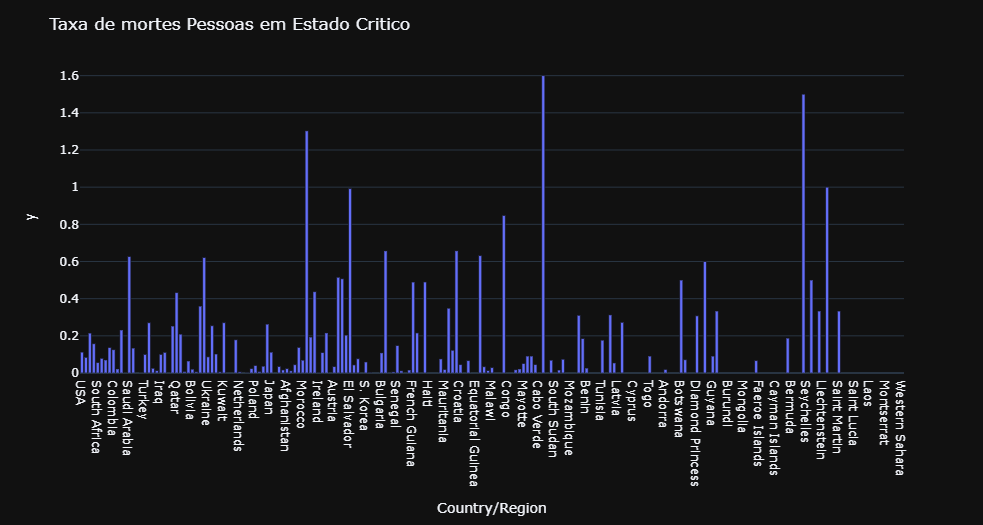

### Analise dos graficos:
> Como podemos notar, os estados unidos e o pais com maior numero de casos, porem analisando a mortalidade vemos que ele não esta tão alto assim, vemos que ele se mantem a taxa de mortalidade abaixo de 0.1, isso e uma analise importante, pois nossa tendencia e achar que o pais que tem mais casos tem uma maior tendecia de mortes, porém como podemos ver os dados nos dizem o contrario, já em paises com menor numero de casos podemos ver uma taxa de mortalidade maior, deve ser pelo fato de serem paises pobres, então atraves dessa analise os paises podem ajudar os paises mais pobres a combater o virus.

> ---

### Automatizando o processso de analises de dados
> Para automatizar esse processo eu vou criar uma função que vai criar um gráfico para cada analise

In [34]:
#Primeiro eu vou exibir meu dataframe, nesse caso vamos ver o DataFrame de dados Agrupados
group_data.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa

In [35]:
#Definindo a função, ela vai receber um DataFrame e um Pais
def Resumo_pais(df,pais):
    #Caso o nome do pais esteja na minha group_data, ele vai seguir em frente
    dados = group_data[group_data['Country/Region']==pais]
    #Depois ele vai localizar as colunas que eu vou querer uma analise
    df=dados.loc[:,['Date','Confirmed','Deaths','Recovered','Active']]
    #Chamando meu supplots para plotar varios graficos, e ele so vai ter uma linha e 4 colunas que vão seus meus dados.
    fig= make_subplots(rows=1,cols=4,subplot_titles=('Confirmed','Active','Recovered','Deaths'))
    #Adicinando um grafico, que vai receber a coluna de confirmed e as informações de confirmed o primeiro confimed e o nome
    # do grafico, e ele vai ser o grafico so vai ter uma linha e ele vai ser a primeira coluna
    fig.add_trace(
        go.Scatter(name='Confirmed',x=df['Date'],y=df['Confirmed']),row=1,col=1
)
    #Mesma coisas daqui pra baixo, so mudando o parametro do nome do grafico e as informações que ele vai receber e a coluna dele
    # Como ele só vai ter uma linha e varias colunas precisamos definir qual vai ser cada coluna
    fig.add_trace(
        go.Scatter(name='Active',x=df['Date'],y=df['Active']),row=1,col=2
)
    fig.add_trace(
        go.Scatter(name='Recovered',x=df['Date'],y=df['Recovered']),row=1,col=3
)
    fig.add_trace(
        go.Scatter(name='Deaths',x=df['Date'],y=df['Deaths']),row=1,col=4
)
    #Aqui no fim, eu defino o tamamanho e altura dele e coloco um titulo com um format para ser variavel com o pais que eu colocar
    # e colocando um tamplate dark nele para deixar mais bonito.
    fig.update_layout(height=600, 
                      width=1000, 
                      title_text="Date Vs Recorded Cases of {}".format(pais),template="plotly_dark")
    fig.show()

In [36]:
#Usando a função e pegando os dados do brasil.
Resumo_pais(group_data,'Brazil')

- Imagem

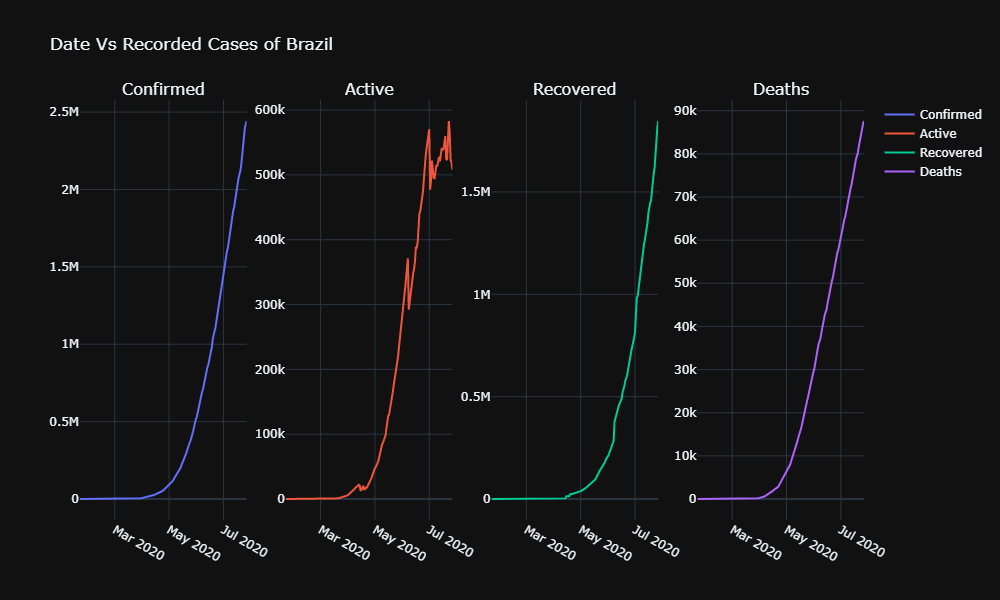

- Através do gráfico podemos ver varias analises de forma automatica, sem mais precisamos fazer varios graficos e o melhor e que podemos escolher o pais que queremos analisar, isso sim é muito poderoso.

### Obrigado, FIM

OBS: Imagens foram colocadas no embaixo dos graficos pois quando eu estava upando pro github ele não estava carregando os graficos, então utilizei fotos.